In [96]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import re

#Reading the data

In [97]:
anime_df = pd.read_csv("anime.csv")
rating_df = pd.read_csv("rating.csv")

#Information about the data

In [98]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [99]:
anime_df.shape

(12294, 7)

In [100]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


About genre attribute

In [101]:
anime_df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

In [102]:
anime_df['genre'].iloc[0]

'Drama, Romance, School, Supernatural'

In [103]:
type(anime_df['genre'].iloc[0])

str

About name attribute

In [104]:
anime_df['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12294, dtype: object

In [105]:
anime_df['name'].iloc[0]

'Kimi no Na wa.'

About type attribute


In [106]:
anime_df['type'].iloc[0]

'Movie'

In [107]:
anime_df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [108]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7831853 entries, 0 to 7831852
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 179.3 MB


In [109]:
rating_df.shape

(7831853, 3)

#Merging the data

In [110]:
df = pd.merge(anime_df,rating_df,on='anime_id',suffixes= ['', '_user'])

In [111]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [112]:
df.shape

(7831843, 9)

#Handle with NaN Values

**Delaing with rating_user column**

Rating out of 10 the user has assigned -1 if the user watched it but didn't assign a rating

In [113]:
df["rating_user"].replace({-1: np.nan}, inplace=True)
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [114]:
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

In [115]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


Finally done with NaN values

In [116]:
df['rating'].value_counts()

8.06    71301
8.17    69197
7.81    67446
7.87    64570
7.95    64175
        ...  
2.55        1
3.38        1
3.67        1
4.18        1
3.20        1
Name: rating, Length: 574, dtype: int64

#Cleaning the name of Anime

In [117]:
def name_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df['name'] = df['name'].apply(name_cleaning)

In [118]:
df['name']

0                                             Kimi no Na wa.
1                                             Kimi no Na wa.
2                                             Kimi no Na wa.
3                                             Kimi no Na wa.
5                                             Kimi no Na wa.
                                 ...                        
7831829         Toushindai My Lover: Minami tai Mecha-Minami
7831832                                          Under World
7831833                                          Under World
7831836                       Violence Gekiga David no Hoshi
7831840    Violence Gekiga Shin David no Hoshi: Inma Dens...
Name: name, Length: 6352499, dtype: object

#Exploratory Data Analysis 

Anime types

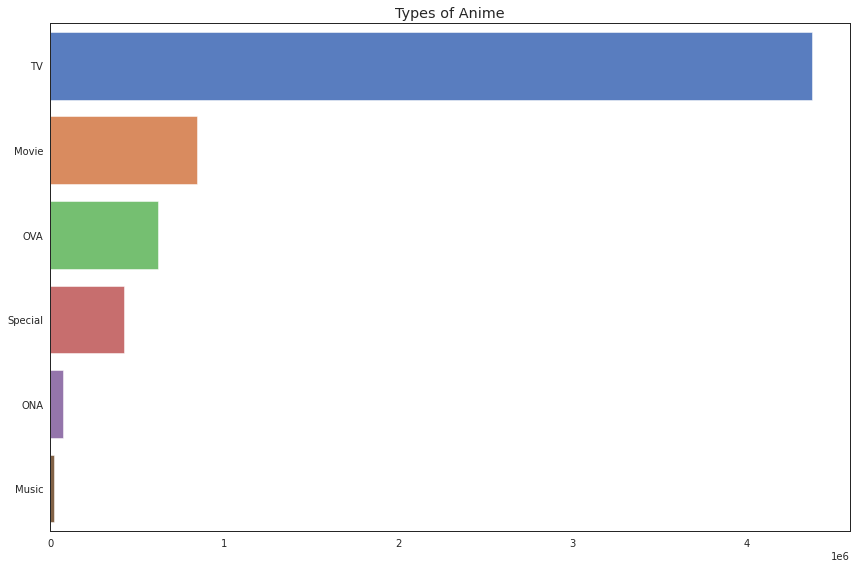

In [119]:
type_count = df['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Types of Anime')

plt.tight_layout()
plt.show()

Analysing rating of Anime

In [120]:
top_anime = df.sort_values(by = 'rating',ascending = False)
top_anime.drop_duplicates(subset=['name'], inplace=True)
top_anime = top_anime[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

In [121]:
top_anime

,name,rating
0,Kimi no Na wa.,9.37
18651,Fullmetal Alchemist: Brotherhood,9.26
27739,Gintama°,9.25
41083,Steins;Gate,9.17
49953,Gintama,9.16
52011,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
58145,Hunter x Hunter (2011),9.13
65595,Gintama: Enchousen,9.11
61621,Ginga Eiyuu Densetsu,9.11
64436,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10


Text(0, 0.5, 'Rating')

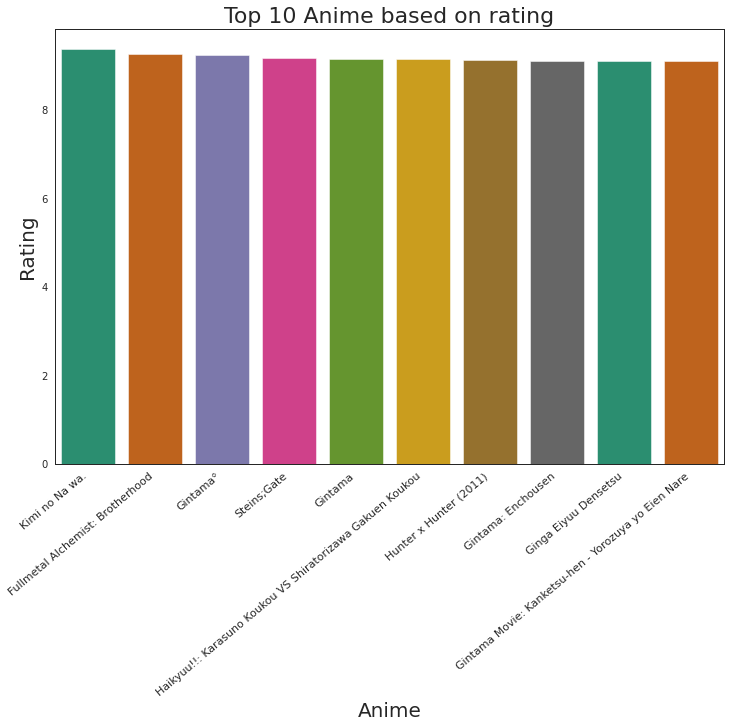

In [122]:
ax=sns.barplot(x="name", y="rating", data=top_anime, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Rating', fontsize = 20)

Distribution of ratings

Text(0.5, 1.0, 'Rating of websites')

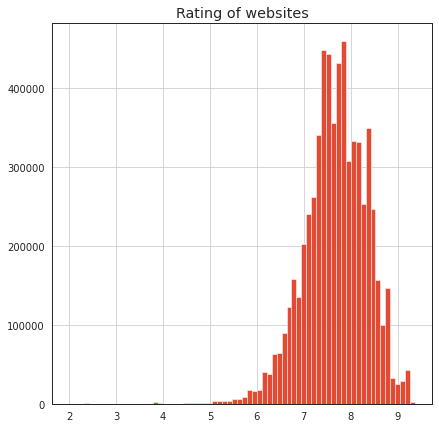

In [123]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
df['rating'].hist(bins=70)
plt.title("Rating of websites")

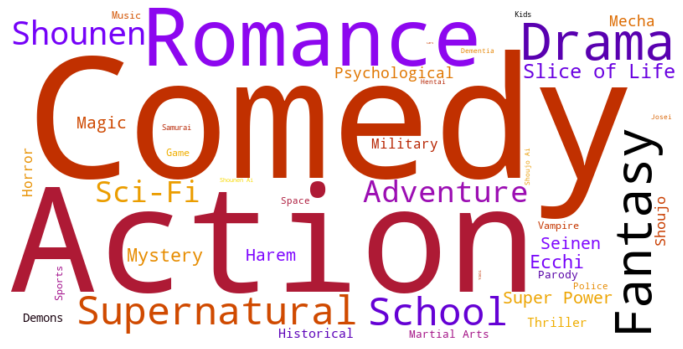

In [124]:
from wordcloud import WordCloud
from collections import defaultdict

all_genres = defaultdict(int)

for genres in df['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94fc4e2040>]],
      dtype=object)

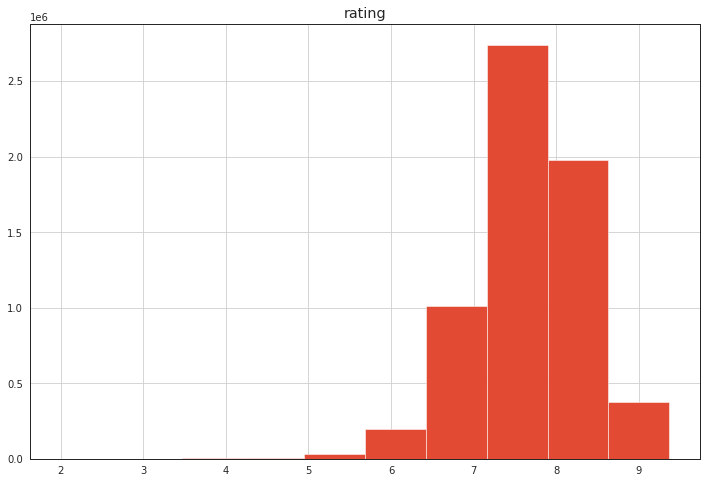

In [125]:
df.hist(column='rating')

#Creating Tags

In [126]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


Removing the comma in genre

In [127]:
def genre_cleaning(text):
    text = re.sub(r",","", text)
    return text

df['genre'] = df['genre'].apply(genre_cleaning)
df['genre']

0          Drama Romance School Supernatural
1          Drama Romance School Supernatural
2          Drama Romance School Supernatural
3          Drama Romance School Supernatural
5          Drama Romance School Supernatural
                         ...                
7831829                               Hentai
7831832                               Hentai
7831833                               Hentai
7831836                               Hentai
7831840                               Hentai
Name: genre, Length: 6352499, dtype: object

Creating a tags column in data frame 

In [128]:
df['tags'] = df['genre'] + " " + df['type']

In [129]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,99,5.0,Drama Romance School Supernatural Movie
1,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,152,10.0,Drama Romance School Supernatural Movie
2,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,244,10.0,Drama Romance School Supernatural Movie
3,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,271,10.0,Drama Romance School Supernatural Movie
5,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,322,10.0,Drama Romance School Supernatural Movie


In [130]:
df['tags'].iloc[0:20]

0     Drama Romance School Supernatural Movie
1     Drama Romance School Supernatural Movie
2     Drama Romance School Supernatural Movie
3     Drama Romance School Supernatural Movie
5     Drama Romance School Supernatural Movie
6     Drama Romance School Supernatural Movie
7     Drama Romance School Supernatural Movie
8     Drama Romance School Supernatural Movie
9     Drama Romance School Supernatural Movie
10    Drama Romance School Supernatural Movie
11    Drama Romance School Supernatural Movie
12    Drama Romance School Supernatural Movie
14    Drama Romance School Supernatural Movie
15    Drama Romance School Supernatural Movie
16    Drama Romance School Supernatural Movie
17    Drama Romance School Supernatural Movie
19    Drama Romance School Supernatural Movie
20    Drama Romance School Supernatural Movie
21    Drama Romance School Supernatural Movie
22    Drama Romance School Supernatural Movie
Name: tags, dtype: object

Drop the duplicate columns

In [131]:
df = df.drop_duplicates(subset=['anime_id', 'name'], keep='first')

In [132]:
df['tags'].iloc[0:20]

0                   Drama Romance School Supernatural Movie
2199      Action Adventure Drama Fantasy Magic Military ...
26820     Action Comedy Historical Parody Samurai Sci-Fi...
28205                                    Sci-Fi Thriller TV
47518     Action Comedy Historical Parody Samurai Sci-Fi...
51194                 Comedy Drama School Shounen Sports TV
52428               Action Adventure Shounen Super Power TV
61008                       Drama Military Sci-Fi Space OVA
61913     Action Comedy Historical Parody Samurai Sci-Fi...
64440     Action Comedy Historical Parody Samurai Sci-Fi...
66981     Drama Fantasy Romance Slice of Life Supernatur...
84875                            Drama School Shounen Movie
84919     Action Comedy Historical Parody Samurai Sci-Fi...
89903     Action Drama Mecha Military Sci-Fi Super Power TV
114203                Comedy Drama School Shounen Sports TV
118180                   Adventure Drama Supernatural Movie
141222                Drama Music Romanc

In [133]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,99,5.0,Drama Romance School Supernatural Movie
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...,TV,64,9.26,793665,3,10.0,Action Adventure Drama Fantasy Magic Military ...
26820,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.25,114262,43,10.0,Action Comedy Historical Parody Samurai Sci-Fi...
28205,9253,Steins;Gate,Sci-Fi Thriller,TV,24,9.17,673572,5,9.0,Sci-Fi Thriller TV
47518,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.16,151266,5,9.0,Action Comedy Historical Parody Samurai Sci-Fi...


In [134]:
df.shape

(9892, 10)

Creating new dataframe

In [135]:
df1 = df.drop(['genre', 'type', 'episodes', 'rating', 'members', 'user_id', 'rating_user'], axis=1)

In [136]:
df1.head()

,anime_id,name,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural Movie
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
26820,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
28205,9253,Steins;Gate,Sci-Fi Thriller TV
47518,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...


In [137]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1.rename(columns = {'name':'animename'}, inplace = True)
df1.head()

,anime_id,animename,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural Movie
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller TV
4,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...


#Model Building

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, stop_words='english')

In [139]:
vector = cv.fit_transform(df1['tags']).toarray()

In [140]:
vector.shape

(9892, 51)

In [141]:
cv.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'movie',
 'music',
 'mystery',
 'ona',
 'ova',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'special',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'tv',
 'vampire',
 'yaoi',
 'yuri']

#Calculating Cosine Similarity

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
similarity = cosine_similarity(vector)

In [144]:
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

The size of the similarity is 9892 X 9892, because of it calculate one movie with all movies.

In [145]:
similarity.shape

(9892, 9892)

In [146]:
def recommend(anime):
    index = df1[df1['animename'] == anime].index[0]
    distances = similarity[index]
    anime_list = sorted(list(enumerate(distances)),reverse=True,key = lambda x: x[1])[1:11]
    for i in anime_list:
        print(df1.iloc[i[0]].animename)

In [147]:
recommend('Naruto')

Dragon Ball Z
Dragon Ball Kai (2014)
Dragon Ball Kai
Medaka Box Abnormal
Medaka Box
Tenjou Tenge
Boruto: Naruto the Movie
Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi
Naruto x UT
Naruto: Shippuuden Movie 4 - The Lost Tower


In [148]:
df1.head()

,anime_id,animename,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural Movie
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller TV
4,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...


#Dump files

In [149]:
!pip install bz2file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import bz2file as bz2
import pickle

with bz2.BZ2File('anime_dict.pbz2', 'w') as f:
  pickle.dump(df1.to_dict(), f)

with bz2.BZ2File('similarity.pbz2', 'w') as f:
  pickle.dump(similarity, f)